# <font color='#0C509E' style='font-size: 40px;'>Regressão Linear - Múltiplas variáveis</font>

## Importando as bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# <font color='#000' style='font-size: 30px;'>Explorando o Dataset</font>
<hr style='border: 1px solid #000;'>

## Importando o Dataset

Source: https://www.kaggle.com/farhanmd29/50-startups

In [3]:
dataset = pd.read_csv('datasets/50_Startups.csv')

In [4]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
dataset.columns = ['P&D', 'Administracao', 'Marketing', 'Estado', 'Lucro']

In [8]:
dataset.head()

,P&D,Administracao,Marketing,Estado,Lucro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
dataset.to_csv('datasets/50_Startups_pt-BR.csv', index=False)

## Informações básicas do dataset

In [13]:
print(f'O dataset possui {dataset.shape[0]} exemplos/observações/amostras/linhas e {dataset.shape[1]} atributos/características/variáveis/colunas')

O dataset possui 50 exemplos/observações/amostras/linhas e 5 atributos/características/variáveis/colunas


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P&D            50 non-null     float64
 1   Administracao  50 non-null     float64
 2   Marketing      50 non-null     float64
 3   Estado         50 non-null     object 
 4   Lucro          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<br/>**"Lucro"** é uma _variável dependente_ e todas as demais são _variáveis independentes_.

## Estatísticas Descritivas

In [18]:
dataset.describe().round(2)

,P&D,Administracao,Marketing,Lucro
count,50.00,50.00,50.00,50.00
mean,73721.62,121344.64,211025.10,112012.64
std,45902.26,28017.80,122290.31,40306.18
min,0.00,51283.14,0.00,14681.40
25%,39936.37,103730.88,129300.13,90138.90
50%,73051.08,122699.80,212716.24,107978.19
75%,101602.80,144842.18,299469.08,139765.98
max,165349.20,182645.56,471784.10,192261.83


0 P&D
1 Administracao
2 Marketing
3 Lucro


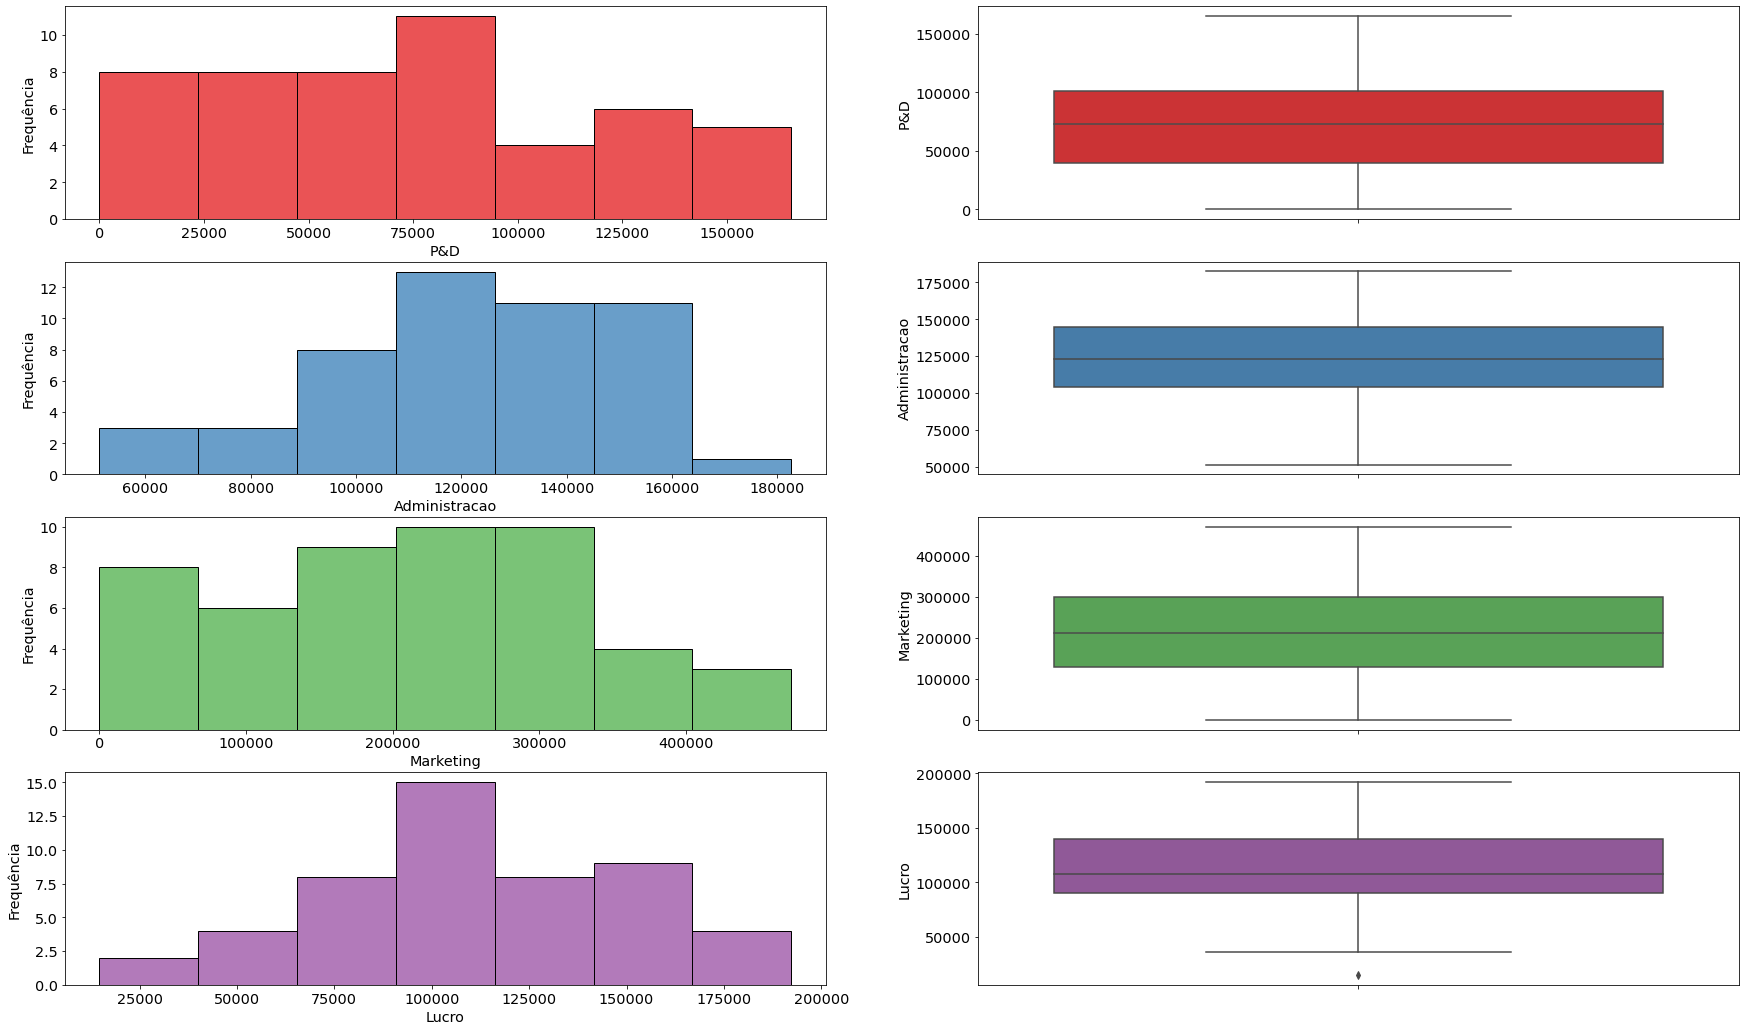

In [38]:
import matplotlib.cm as cm
cmap = cm.get_cmap('Set1').colors  # color map

fig = plt.figure(figsize=(30, 18))

atributos = ['P&D', 'Administracao', 'Marketing', 'Lucro']
n_atributos = len(atributos)

for idx, atributo in enumerate(atributos):
    print(idx, atributo)
    axis_1 = fig.add_subplot(n_atributos, 2, 2*idx + 1)
    axis_1.set_xlabel(atributo)
    axis_1.set_ylabel('Frequência')
    sns.histplot(data=dataset, x=atributo, ax=axis_1, color=cmap[idx])

    axis_2 = fig.add_subplot(n_atributos, 2, 2*idx + 2)
    sns.boxplot(data=dataset, y=atributo, ax=axis_2, color=cmap[idx])

## Analisando os Estados (Variável Categórica)

### Proporção de observações por Estado

<AxesSubplot:xlabel='Estado', ylabel='count'>

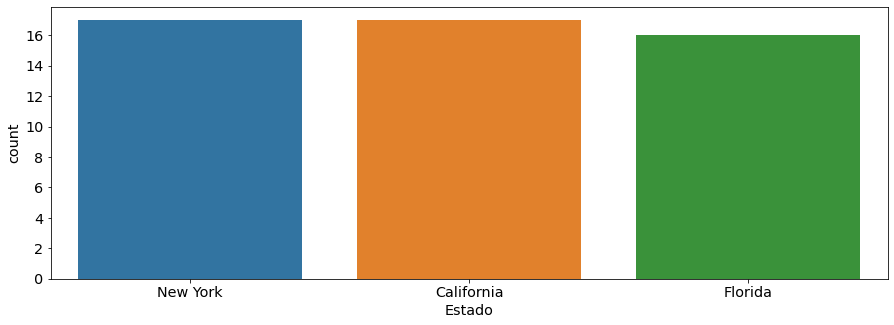

In [40]:
sns.countplot(data=dataset, x='Estado')

In [43]:
dataset.groupby('Estado').size()

Estado
California    17
Florida       16
New York      17
dtype: int64

### Lucro médio (e desvio padrão) por Estado

<AxesSubplot:xlabel='Estado', ylabel='Lucro'>

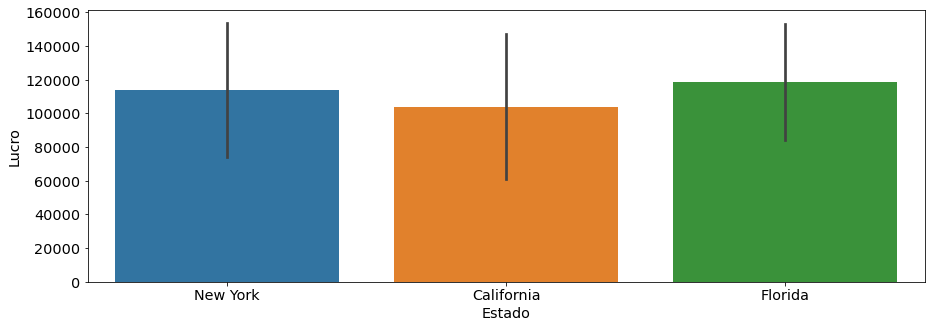

In [46]:
sns.barplot(data=dataset, x='Estado', y='Lucro', ci='sd')

In [49]:
dataset.groupby('Estado')['Lucro'].describe()

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
California,17.0,103905.175294,44446.359357,14681.40,78239.9100,97427.84,134307.3500,191792.06
Florida,16.0,118774.024375,35605.470428,49490.75,99147.9225,109543.12,142719.6275,191050.39
New York,17.0,113756.446471,41140.258117,35673.41,96479.5100,108552.04,129917.0400,192261.83


### Distribuição dos Lucros por Estado

<AxesSubplot:xlabel='Estado', ylabel='Lucro'>

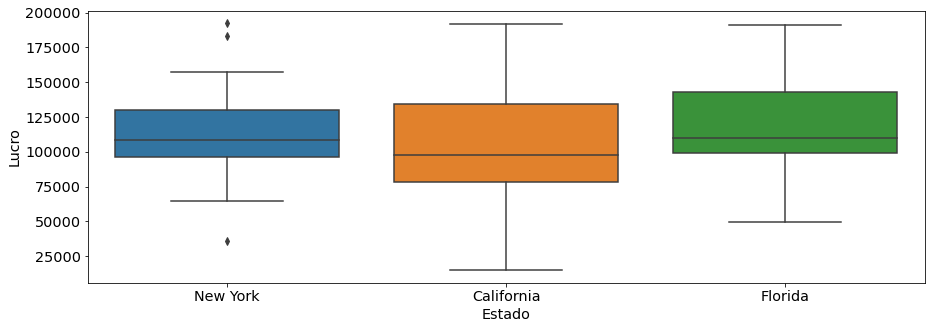

In [50]:
sns.boxplot(data=dataset, x='Estado', y='Lucro')

## Matriz de correlação

O **coeficiente de correlação** é uma medida que mede a associação linear entre duas variáveis. Seu valor varia de **_-1_** (associação negativa perfeita) e **_+1_** (associação positiva perfeita).
<img src="imagens/correlation_coefficient.png" width="70%" />

Fonte: https://dataz4s.com/statistics/correlation-coefficient/

In [52]:
dataset.corr()

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.241955,0.724248,0.972900
Administracao,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Lucro,0.972900,0.200717,0.747766,1.000000


<br/>Note que a correlação entre o **Lucro** e os investimentos em **P&D** é bem alta. Em uma escala menor, a correlação entre o **Lucro** e os investimentos em **Marketing** também é expressiva.

#### Correlação por Estado

In [55]:
dataset.groupby('Estado').corr()

P&D  Administracao  Marketing     Lucro
Estado                                                                
California P&D            1.000000       0.193109   0.742708  0.975064
           Administracao  0.193109       1.000000  -0.090714  0.161666
           Marketing      0.742708      -0.090714   1.000000  0.794036
           Lucro          0.975064       0.161666   0.794036  1.000000
Florida    P&D            1.000000       0.053469   0.545440  0.970117
           Administracao  0.053469       1.000000  -0.353783 -0.041762
           Marketing      0.545440      -0.353783   1.000000  0.569445
           Lucro          0.970117      -0.041762   0.569445  1.000000
New York   P&D            1.000000       0.406806   0.803902  0.976410
           Administracao  0.406806       1.000000   0.144562  0.398472
           Marketing      0.803902       0.144562   1.000000  0.810238
           Lucro          0.976410       0.398472   0.810238  1.000000

In [57]:
corr_df = dataset.groupby('Estado').corr()

In [58]:
corr_df.loc['California']

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.193109,0.742708,0.975064
Administracao,0.193109,1.000000,-0.090714,0.161666
Marketing,0.742708,-0.090714,1.000000,0.794036
Lucro,0.975064,0.161666,0.794036,1.000000


<br/>

A correlação entre o **Lucro** e os investimentos em **P&D** é bem alta.<br/>
A correlação entre o **Lucro** e os investimentos em **Administração** não é expressiva, sendo perto de zero, o que sugere que tais variáveis não são correlatas.<br/>
A correlação entre o **Lucro** e os investimentos em **Marketing** é consideravelmente alta.<br/>

In [60]:
corr_df.loc['Florida']

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.053469,0.545440,0.970117
Administracao,0.053469,1.000000,-0.353783,-0.041762
Marketing,0.545440,-0.353783,1.000000,0.569445
Lucro,0.970117,-0.041762,0.569445,1.000000


<br/>

A correlação entre o **Lucro** e os investimentos em **P&D** também é bem alta na _Florida_.<br/>
A correlação entre o **Lucro** e os investimentos em **Administração** não é expressiva, sendo perto de zero, o que sugere que tais variáveis não são correlatas.<br/>
A correlação entre o **Lucro** e os investimentos em **Marketing** é menor do que na _California_, mas ainda indica uma certa correlação entre as duas variáveis.<br/>

In [61]:
corr_df.loc['New York']

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.406806,0.803902,0.976410
Administracao,0.406806,1.000000,0.144562,0.398472
Marketing,0.803902,0.144562,1.000000,0.810238
Lucro,0.976410,0.398472,0.810238,1.000000


<br/>

A correlação entre o **Lucro** e os investimentos em **P&D** também é bem alta.<br/>
Diferente da _California_ e _Florida_, os investimentos em **Aministração** parecem ter uma certa influência no **Lucro** das empresas de NY, uma vez que a correlação de tais variáveis é "relativamente" expressiva.<br/>
A correlação entre o **Lucro** e os investimentos em **Marketing** é consideravelmente alta.<br/>

# <font color='#000' style='font-size: 30px;'>Variável Dependente (y) vs Variáveis Independentes/Explicativas</font>
<hr style='border: 1px solid #000;'>

## `pairplot`

Plota o relacionamento entre pares de variáveis em um dataset.

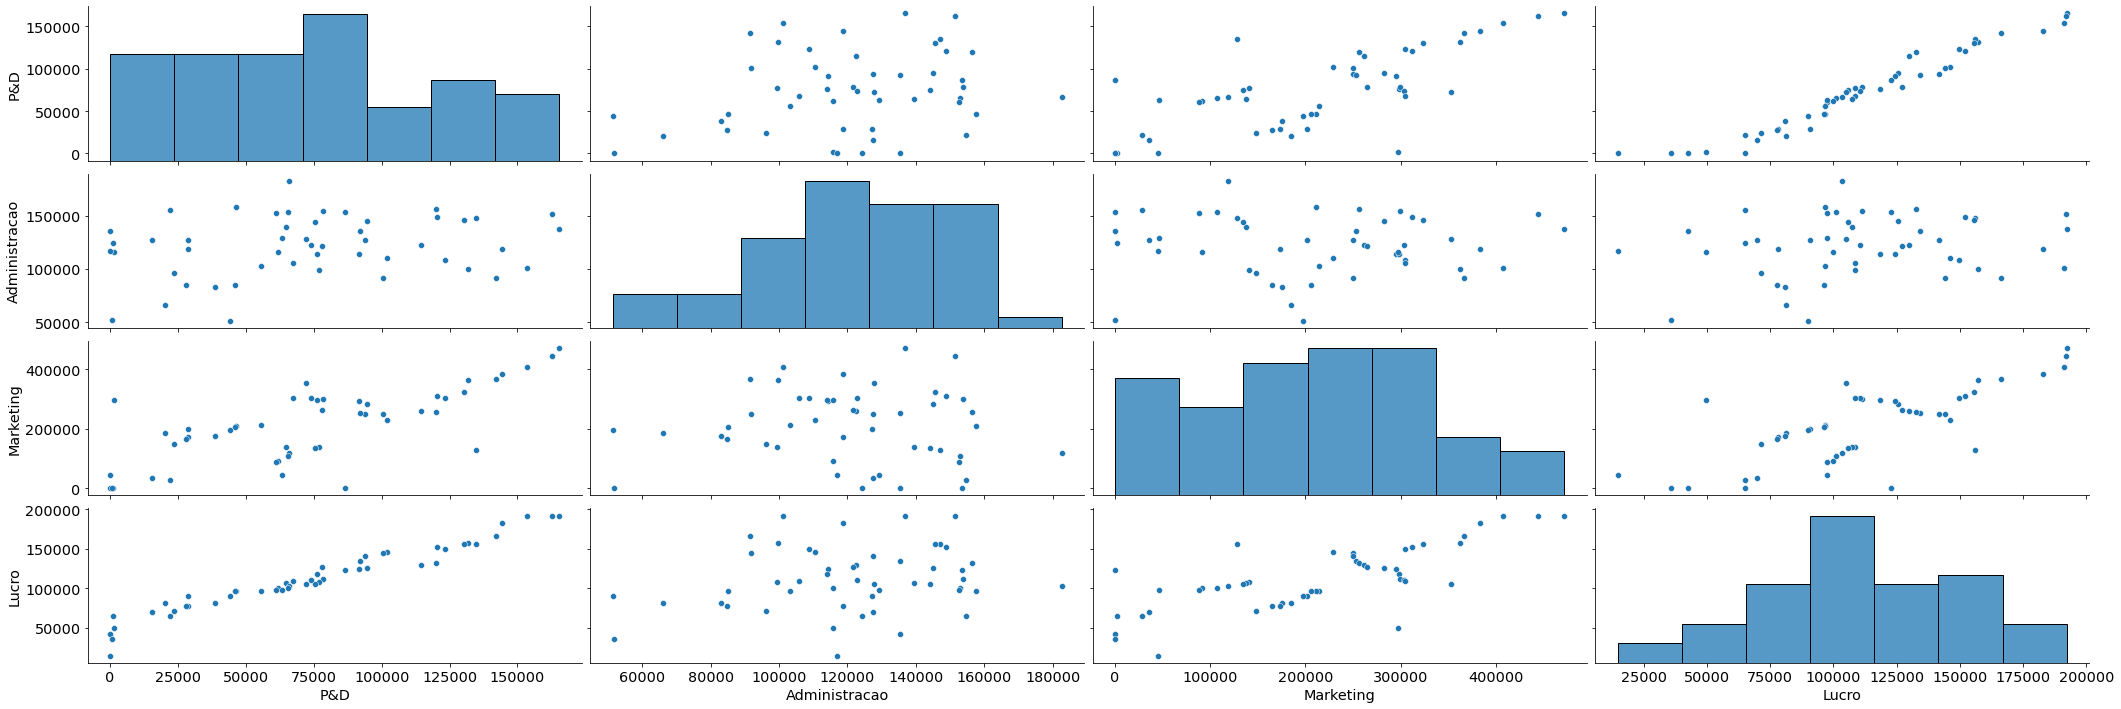

In [64]:
sns.pairplot(dataset, aspect=3)
# Lucro	0.972900	0.200717	0.747766	1.000000

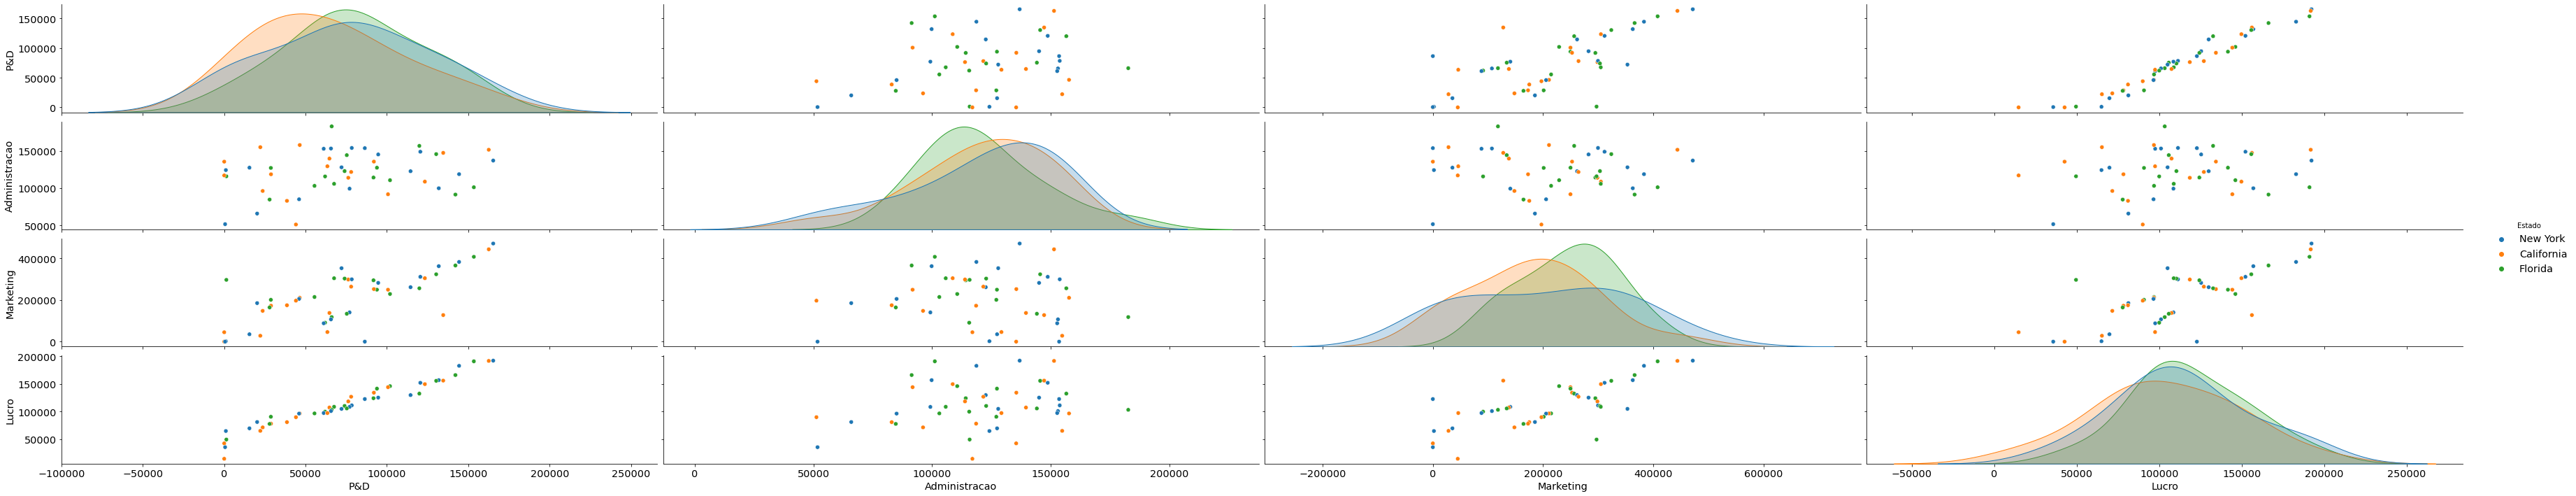

In [65]:
sns.pairplot(dataset, aspect=5, hue='Estado')
# plt.savefig('output.png')

## `jointplot`
Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.

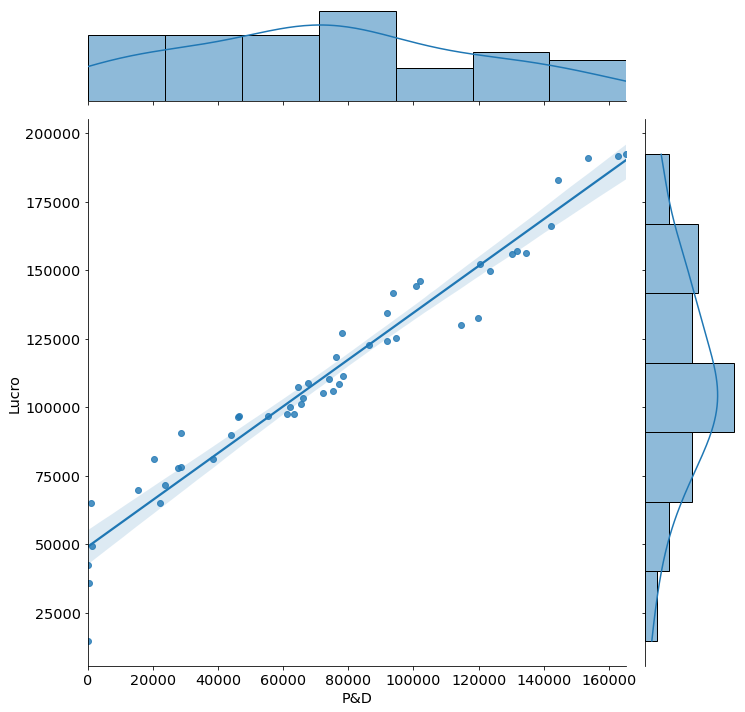

In [67]:
sns.jointplot(data=dataset, x='P&D', y='Lucro', kind='reg', height=10)

## `lmplot`
Plota a reta de regressão entre duas variáveis juntamente com suas respectivas dispersões.

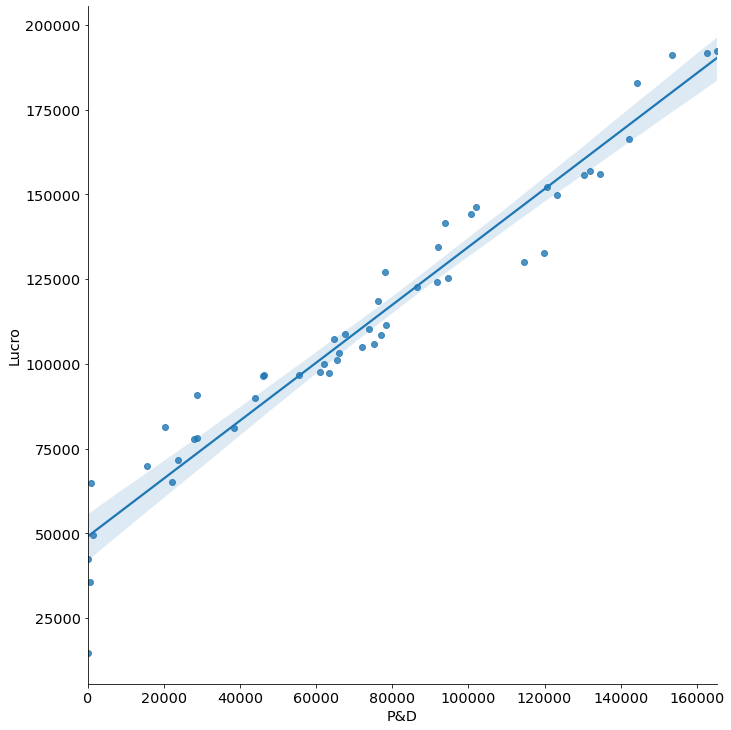

In [68]:
sns.lmplot(data=dataset, x='P&D', y='Lucro', height=10)

## Visualizando a Variável Dependente e 2 Variáveis Independentes

In [69]:
dataset.corr()

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.241955,0.724248,0.972900
Administracao,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Lucro,0.972900,0.200717,0.747766,1.000000


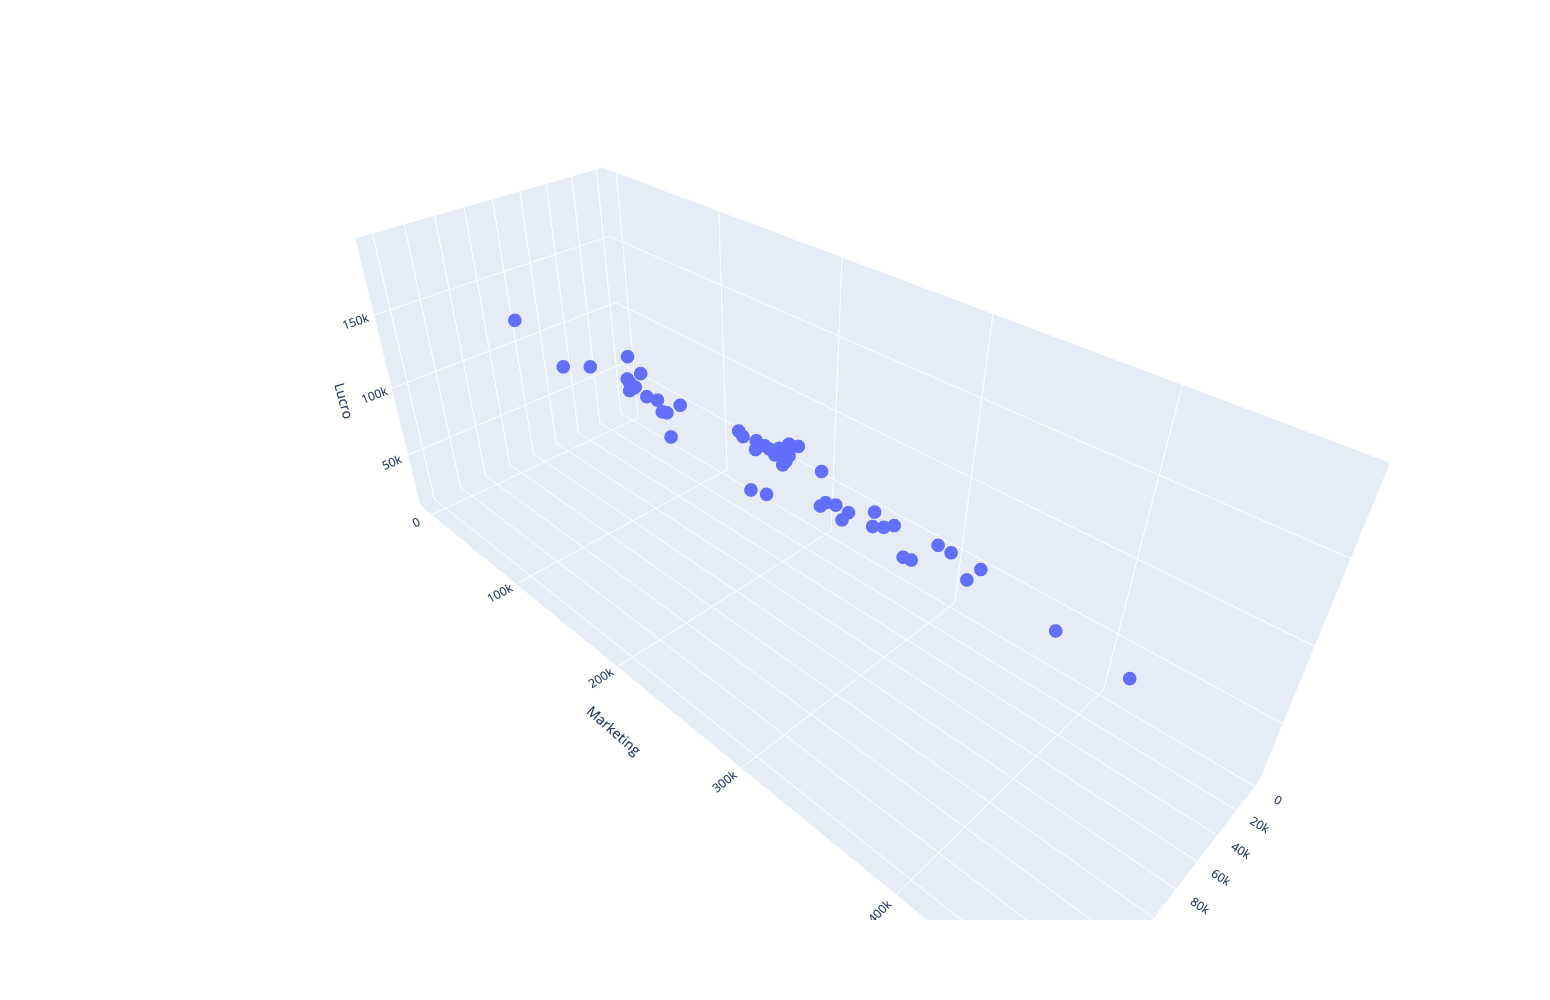

In [71]:
# pip install plotly
# jupyter labextension install jupyterlab-plotly

import plotly.express as px

fig = px.scatter_3d(dataset, x='P&D', y='Marketing', z='Lucro', width=1000, height=1000)
fig.show()

# <font color='#000' style='font-size: 30px;'>Estimando um modelo linear</font>
<hr style='border: 1px solid #000;'>

A **regressão linear** é uma abordagem para modelar o relacionamento entre variáveis independentes (explicativas) e dependentes numéricas, ajustando um modelo linear (p. ex., uma reta) para as observações de um conjunto treinamento.

Tal modelo linear é usado para a prever variáveis dependentes numéricas a partir das variáveis independentes de novas observações (ainda não vistas).

## Transformando variáveis categóricas em Variáveis _Dummy_

In [72]:
dataset.head()

,P&D,Administracao,Marketing,Estado,Lucro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [75]:
dataset['Estado'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [76]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P&D            50 non-null     float64
 1   Administracao  50 non-null     float64
 2   Marketing      50 non-null     float64
 3   Estado         50 non-null     object 
 4   Lucro          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [81]:
dataset_pre = pd.get_dummies(data=dataset, columns=['Estado'])

In [82]:
dataset_pre.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [84]:
dataset.head()  # o dataset original se mantém ileso depois do get_dummies()

,P&D,Administracao,Marketing,Estado,Lucro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Alternativa: OneHotEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

##### Pros x Cons

1. Com o **_OneHotEnconder_**, podemos criar uma _função/modelo_ para criar as **dummy variables** a partir de nosso **conjunto de treinamento**. Podemos então aplicar tal modelo para novos dados, sem nenhum problema.

2. Com o **_OneHotEnconder_**, se o **conjunto de teste** possuir valores **NÃO** vistos no **conjunto de treinamento** para a _varável categórica_ a ser transformada em **dummy**, podemos informar a ação que desejamos tomar. Basta passarmos o parâmetro: handle_unknown{‘error’, ‘ignore’}. Isso é extremamente interessante quando já temos modelos treinados em produção, de modo que valores não suportados deverão ser identificados antes do uso do modelo.

No caso do **_get_dummies()_**, precisaremos ter todos os dados de **treinamento e teste** na mesma tabela, a fim de mantermos a consistência da criação das variáveis dummy – p. ex: A coluna Estado_California deverá vir antes de Estado_Florida e Estado_New York – o que resolveria o caso (1). Tal junção também resolveria o caso (2), uma vez que a função criaria uma nova coluna para **todo novo valor** para a variável categórica. <br/>
Mas, note que isso limita seu uso em _PRODUÇÃO_, com modelos já treinados para um dado conjunto de valores categóricos, exigindo um retreinamento do modelo para todo novo conjunto de teste.

Fonte: https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki

## Evitando o Dummy Variable Trap

In [86]:
dataset_pre.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [87]:
dataset_final = dataset_pre.drop(columns=['Estado_California'])

In [88]:
dataset_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [89]:
### ALTERNATIVAMENTE
dataset_final = pd.get_dummies(data=dataset, columns=['Estado'], drop_first=True)

In [90]:
dataset_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


## Extraindo as variáveis independentes e dependentes

### Criando um DataFrame para armazenar as variáveis independentes/explicativas (X)

In [93]:
dataset_final.columns

Index(['P&D', 'Administracao', 'Marketing', 'Lucro', 'Estado_Florida',
       'Estado_New York'],
      dtype='object')

In [95]:
variaveis_independentes = ['P&D', 'Administracao', 'Marketing', 'Estado_Florida', 'Estado_New York']
variaveis_independentes

['P&D', 'Administracao', 'Marketing', 'Estado_Florida', 'Estado_New York']

In [96]:
X = dataset_final[variaveis_independentes]
X.head()

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


### Criando uma Series para armazenar a variável dependente (y)

In [99]:
y = dataset_final['Lucro']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Lucro, dtype: float64

## Dividindo o dataset em Conjunto de Treinamento e Conjunto de Teste

In [101]:
from sklearn.model_selection import train_test_split

test_size = 0.2  # taxa de amostras/exemplos que serão amostras de teste ==> neste caso, 20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

In [120]:
X_train.head()

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
33,55493.95,103057.49,214634.81,1,0
35,46014.02,85047.44,205517.64,0,1
26,75328.87,144135.98,134050.07,1,0
34,46426.07,157693.92,210797.67,0,0
18,91749.16,114175.79,294919.57,1,0


In [121]:
X_train.index

Int64Index([33, 35, 26, 34, 18,  7, 14, 45, 48, 29, 15, 30, 32, 16, 42, 20, 43,
             8, 13, 25,  5, 17, 40, 49,  1, 12, 37, 24,  6, 23, 36, 21, 19,  9,
            39, 46,  3,  0, 47, 44],
           dtype='int64')

In [124]:
dataset.loc[X_train.index].groupby('Estado').size()

Estado
California    16
Florida       10
New York      14
dtype: int64

In [105]:
X_test

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0
27,72107.60,127864.55,353183.81,0,1
38,20229.59,65947.93,185265.10,0,1
31,61136.38,152701.92,88218.23,0,1
22,73994.56,122782.75,303319.26,1,0
4,142107.34,91391.77,366168.42,1,0


In [106]:
y_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
Name: Lucro, dtype: float64

## Verificando os tamanhos dos conjuntos de treino e teste

In [107]:
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')

X_train.shape = (40, 5), y_train.shape = (40,)


In [108]:
print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

X_test.shape = (10, 5), y_test.shape = (10,)


## Treinando o modelo de Regressão Linear Simples com o Conjunto de Treinamento

In [109]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [110]:
regressor.fit(X_train, y_train)  # treina um modelo de regressão linear

LinearRegression()

## Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha (hiperplano) de regressão se ajusta aos dados. É um valor entre **0 e 1**. <br/>
Ele expressa a **quantidade da variância dos dados** que é explicada pelo modelo linear. <br/>
P. ex: R² = 0.7512 significa que o modelo linear explica 75.12% da variância da variável dependente (no caso, o 'Lucro') a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [111]:
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.9501847627493607


## Predizendo os Lucros para as Amostras/Exemplos de Teste

In [112]:
X_test.head()

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
28,66051.52,182645.56,118148.20,1,0
11,100671.96,91790.61,249744.55,0,0
10,101913.08,110594.11,229160.95,1,0
41,27892.92,84710.77,164470.71,1,0
2,153441.51,101145.55,407934.54,1,0


In [113]:
y_pred = regressor.predict(X_test)

In [115]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [118]:
resultados = pd.DataFrame({
    'Lucro - Predicao': y_pred,
    'Lucro - Real': y_test,
    'Erro Absoluto': abs(y_test - y_pred)  # erro absoluto
})

In [125]:
resultados

,Lucro - Predicao,Lucro - Real,Erro Absoluto
28,103015.201598,103282.38,267.178402
11,132582.277608,144259.40,11677.122392
10,132447.738452,146121.95,13674.211548
41,71976.098513,77798.83,5822.731487
2,178537.482211,191050.39,12512.907789
27,116161.242302,105008.31,11152.932302
38,67851.692097,81229.06,13377.367903
31,98791.733747,97483.56,1308.173747
22,113969.435330,110352.25,3617.185330
4,167921.065696,166187.94,1733.125696


In [127]:
resultados.index

Int64Index([28, 11, 10, 41, 2, 27, 38, 31, 22, 4], dtype='int64')

In [129]:
estados_amostras_teste = dataset.loc[resultados.index, 'Estado']
estados_amostras_teste

28       Florida
11    California
10       Florida
41       Florida
2        Florida
27      New York
38      New York
31      New York
22       Florida
4        Florida
Name: Estado, dtype: object

In [130]:
resultados['Estado'] = estados_amostras_teste

In [132]:
resultados

,Lucro - Predicao,Lucro - Real,Erro Absoluto,Estado
28,103015.201598,103282.38,267.178402,Florida
11,132582.277608,144259.40,11677.122392,California
10,132447.738452,146121.95,13674.211548,Florida
41,71976.098513,77798.83,5822.731487,Florida
2,178537.482211,191050.39,12512.907789,Florida
27,116161.242302,105008.31,11152.932302,New York
38,67851.692097,81229.06,13377.367903,New York
31,98791.733747,97483.56,1308.173747,New York
22,113969.435330,110352.25,3617.185330,Florida
4,167921.065696,166187.94,1733.125696,Florida


In [133]:
resultados.describe()

,Lucro - Predicao,Lucro - Real,Erro Absoluto
count,10.000000,10.00000,10.000000
mean,118325.396755,122277.40700,7514.293660
std,36245.154679,37696.02975,5481.104393
min,67851.692097,77798.83000,267.178402
25%,99847.600710,98933.26500,2204.140604
50%,115065.338816,107680.28000,8487.831895
75%,132548.642819,145656.31250,12303.961440
max,178537.482211,191050.39000,13674.211548


In [139]:
resultados.groupby('Estado')['Erro Absoluto'].describe()

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
California,1.0,11677.122392,NaN,11677.122392,11677.122392,11677.122392,11677.122392,11677.122392
Florida,6.0,6271.223375,5615.172441,267.178402,2204.140604,4719.958409,10840.363714,13674.211548
New York,3.0,8612.824651,6423.042274,1308.173747,6230.553024,11152.932302,12265.150102,13377.367903


### Visualizando os Erros

<AxesSubplot:ylabel='Erro Absoluto'>

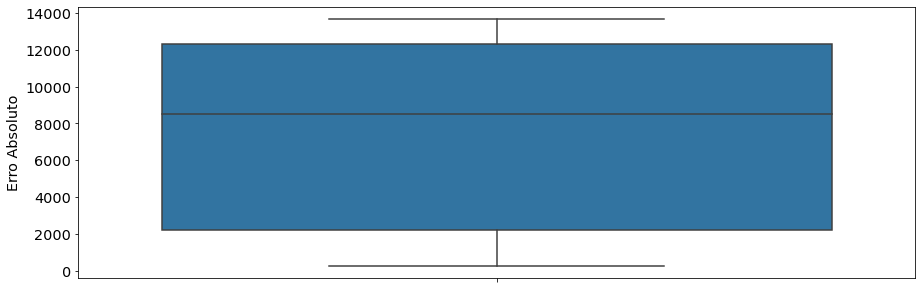

In [137]:
sns.boxplot(data=resultados, y='Erro Absoluto')

<AxesSubplot:xlabel='Estado', ylabel='Erro Absoluto'>

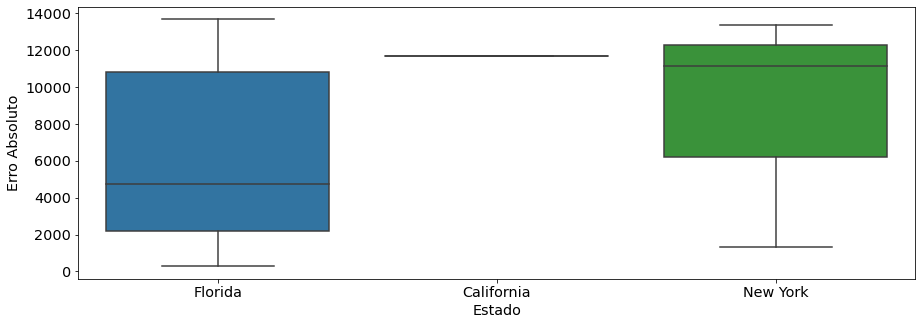

In [138]:
sns.boxplot(data=resultados, x='Estado', y='Erro Absoluto')

# <font color='#000' style='font-size: 30px;'>Medindo a Acurácia das Predições</font>
<hr style='border: 1px solid #000;'>

## Mean Absolute Error (MAE)
<img src="imagens/mae.svg" />

In [140]:
# foi computado pelo describe do DataFrame `resultados`==> 7514.293660

In [141]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, y_pred)  # y_test == y_true
MAE

7514.293659640612

## Mean Squared Error (MSE)
<img src="imagens/mse.svg" />

Uma vez que os **erros** são elevados ao quadrado antes do cômputo do _erro médio_, o MSE dá maior peso para **erros grandes**, do que o MAE.

In [142]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test, y_pred)  # y_test == y_true
MSE

83502864.03257759

## Root Mean Squared Error (RMSE)
Raíz quadrada do MSE.

In [143]:
np.sqrt(MSE)

9137.990152794957

In [144]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)  # y_test == y_true
RMSE

9137.990152794957

# <font color='#000' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 1px solid #000;'>

In [145]:
dataset_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


<img src="imagens/interpretacao_dos_coeficientes.png" />

## Intercepto do modelo
O **intercepto** do modelo representa o _efeito médio_ em $Y$ (Lucro) tendo todas as variáveis independentes zeradas (excluídas do modelo). 

Como $x_4=x_5=0$, este cenário consiste do Estado da _California_. Portanto, o coeficiente de regressão para _California_ estará incluso no **intercepto** (veremos mais jajá).

In [146]:
regressor.intercept_

42554.16761773237

## Coeficientes de regressão
Os **coeficientes de regressão (hiperplano)** $b_1$, $b_2$, $b_3$, $b_4$ e $b_5$ são conhecidos como **coeficientes parciais de regressão** ou **coeficientes parciais angulares**. Em outras palavras:
- $b_1$ mede a variação no valor médio de $Y$ (Lucro), por unidade de variação em $x_1$ (P&D), mantendo-se os valores de $x_2$ (Administração), $x_3$ (Marketing), $x_4$ (Florida) e $x_5$ (New York) constantes.

Ele nos dá o _efeito "direto"_ de uma unidade de variação em $x_1$ sobre o valor médio de $Y$, excluídos os efeitos que as demais variáveis independentes possam ter sobre a média de $Y$.

De modo análogo podemos interpretar os demais coeficientes de regressão.

In [148]:
regressor.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -9.59284160e+02,
        6.99369053e+02])

In [150]:
X.columns

Index(['P&D', 'Administracao', 'Marketing', 'Estado_Florida',
       'Estado_New York'],
      dtype='object')

In [151]:
index = ['Intercepto', 'P&D', 'Administracao', 'Marketing', 'Estado_Florida', 'Estado_New York']

In [155]:
parametros = np.append(regressor.intercept_, regressor.coef_)
parametros

array([ 4.25541676e+04,  7.73467193e-01,  3.28845975e-02,  3.66100259e-02,
       -9.59284160e+02,  6.99369053e+02])

In [156]:
pd.DataFrame(data=parametros, index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,42554.167618
P&D,0.773467
Administracao,0.032885
Marketing,0.036610
Estado_Florida,-959.284160
Estado_New York,699.369053


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das <i>variáveis independentes</i> ($x_2=x_3=x_4=x_5=0$), o efeito médio no Lucro das startups seria de <b>\$ 42554.16</b>. Ao assumir $x_4=x_5=0$, estamos assumindo que o _Estado_ é a <i>California</i>. Assim, o coeficiente de regressão para <i>California</i> está incluso neste <b>intercepto</b>. Se tivessemos mais variáveis categóricas que foram transformadas em variáveis <i>dummy</i>, todas as variáveis <i>dummy</i> excluídas da tabela teriam seus coeficientes de regressão inclusos no <b>intercepto</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <b>P&D</b> → Mantendo-se os valores das outras <i>variáveis independentes</i> <b>constantes</b>, o acréscimo de $ 1 de investimento em P&D gera uma variação média no Lucro das startups de <b>\$ 0.773467</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <b>Administração</b> → Mantendo-se os valores das outras <i>variáveis independentes</i> <b>constantes</b>, o acréscimo de $ 1 de investimento em Administração gera uma variação média no Lucro das startups de <b>\$ 0.032885</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <b>Marketing</b> → Mantendo-se os valores das outras <i>variáveis independentes</i> <b>constantes</b>, o acréscimo de $ 1 de investimento em Marketing gera uma variação média no Lucro das startups de <b>\$ 0.036610</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <b>Startups na Florida</b> → Mantendo-se os valores das outras <i>variáveis independentes</i> <b>constantes</b>, o fato da startup estar na Florida gera uma variação média no Lucro das startups de <b>\$ -959.284160</b>.
</p>
    
<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <b>Startups em New York</b> → Mantendo-se os valores das outras <i>variáveis independentes</i> <b>constantes</b>, o fato da startup estar em New York gera uma variação média no Lucro das startups de <b>\$ 699.369053</b>.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
    <b>Startups na California</b> → Mesmo caso do _Intercepto_.
</p>


# <font color='#000' style='font-size: 30px;'>O LinearRegression do `sklearn` já trata o Dummy Variable Trap?</font>
<hr style='border: 1px solid #000;'>

In [158]:
dataset_pre.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


## Obtendo os novos X e y

In [159]:
dataset_pre.columns

Index(['P&D', 'Administracao', 'Marketing', 'Lucro', 'Estado_California',
       'Estado_Florida', 'Estado_New York'],
      dtype='object')

In [160]:
variaveis_independentes = ['P&D', 'Administracao', 'Marketing', 'Estado_California', 'Estado_Florida', 'Estado_New York']
variaveis_independentes

['P&D',
 'Administracao',
 'Marketing',
 'Estado_California',
 'Estado_Florida',
 'Estado_New York']

In [161]:
X_dummy = dataset_pre[variaveis_independentes]
X_dummy.head()

,P&D,Administracao,Marketing,Estado_California,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [162]:
y_dummy = dataset_pre['Lucro']
y_dummy.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Lucro, dtype: float64

## Dividindo o conjunto em Treinamento e Teste

In [168]:
test_size = 0.2  # taxa de amostras/exemplos que serão amostras de teste ==> neste caso, 20%

X_dummy_train, X_dummy_test, y_dummy_train, y_dummy_test = train_test_split(X_dummy, y_dummy, test_size=test_size, random_state=0)

In [169]:
X_dummy_train.head()

,P&D,Administracao,Marketing,Estado_California,Estado_Florida,Estado_New York
33,55493.95,103057.49,214634.81,0,1,0
35,46014.02,85047.44,205517.64,0,0,1
26,75328.87,144135.98,134050.07,0,1,0
34,46426.07,157693.92,210797.67,1,0,0
18,91749.16,114175.79,294919.57,0,1,0


In [165]:
X_train.head()

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
33,55493.95,103057.49,214634.81,1,0
35,46014.02,85047.44,205517.64,0,1
26,75328.87,144135.98,134050.07,1,0
34,46426.07,157693.92,210797.67,0,0
18,91749.16,114175.79,294919.57,1,0


In [170]:
y_dummy_train.head()

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Lucro, dtype: float64

In [172]:
y_train.head()

33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
Name: Lucro, dtype: float64

## Treinando o modelo de Regressão Linear sem tratar o Dummy Variable Trap

In [173]:
regressor_dummy = LinearRegression()
regressor_dummy.fit(X_dummy_train, y_dummy_train)

LinearRegression()

## Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

### Coeficiente de Determinação - R²

In [174]:
print(f'R²_dummy = {regressor_dummy.score(X_dummy_train, y_dummy_train)}')

R²_dummy = 0.9501847627493607


In [175]:
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.9501847627493607


## Predizendo os Lucros para as Amostras/Exemplos de Teste

In [176]:
y_dummy_pred = regressor_dummy.predict(X_dummy_test)

## Erros - Métricas

In [179]:
MSE_dummy = mean_squared_error(y_dummy_test, y_dummy_pred)
MSE_dummy

83502864.03257766

In [180]:
MSE  # do regressor 'original'

83502864.03257759

<br/>

Tudo levar a crer que o modelo de **Regressão Linear** do _Scikit-learn_ já trate a **_dummy variable trap_**. Porém, não achei nenhuma documentação oficial que falasse isso.

# <font color='#000' style='font-size: 30px;'><i>Overfitting:</i> Sobreajustando nosso modelo</font>
<hr style='border: 1px solid #000;'>

É um termo usado em estatística para descrever quando um modelo estatístico se **ajusta muito bem** ao conjunto de dados de trainamento, utilizados para treinar o modelo, mas se mostra _ineficaz_ para prever novos resultados não-vistos --> **não generaliza para novos dados**.

# Treinando um modelo de regressão linear com pouquíssimas amostras

## Extraindo o conjunto de Treino e Teste

In [181]:
dataset_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [183]:
X.head()  # obtido em passos anteriores - sem o atributo 'Lucro'

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0


In [184]:
y.head()  # obtido em passos anteriores - o atributo 'Lucro'

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Lucro, dtype: float64

In [187]:
train_size = 0.1  # taxa de amostras/exemplos que serão amostras de treinamento ==> neste caso, 10%

X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=train_size, random_state=0)

In [188]:
X2_train

,P&D,Administracao,Marketing,Estado_Florida,Estado_New York
46,1315.46,115816.21,297114.46,1,0
3,144372.41,118671.85,383199.62,0,1
0,165349.20,136897.80,471784.10,0,1
47,0.00,135426.92,0.00,0,0
44,22177.74,154806.14,28334.72,0,0


In [189]:
y2_train

46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Lucro, dtype: float64

In [191]:
X2_test.shape

(45, 5)

In [192]:
y2_test.shape

(45,)

## Treinando o modelo de Regressão Linear

In [193]:
regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)

LinearRegression()

## Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

### Coeficiente de Determinação - R²

In [196]:
print(f'R² = {regressor2.score(X2_train, y2_train)}')  # ajuste perfeito ==> é como se seu modelo tivesse 'decorado' as amostras do conjunto de treinamento

R² = 1.0


In [197]:
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.9501847627493607


## Predizendo amostras de teste

In [198]:
y2_pred = regressor2.predict(X2_test)

## Métricas de Acurácia

### RMSE

In [199]:
RMSE2 = mean_squared_error(y2_test, y2_pred, squared=False)
RMSE2 # error usando um regressor linear treinado com 10% dos dados

42607.93010960491

In [200]:
RMSE  # error usando um regressor linear treinado com 80% dos dados

9137.990152794957

### MAE

In [201]:
MAE2 = mean_absolute_error(y2_test, y2_pred)
MAE2 # error usando um regressor linear treinado com 10% dos dados

33614.846869615416

In [203]:
MAE # error usando um regressor linear treinado com 80% dos dados

7514.293659640612

# Soluções

1. Se o conjunto de dados é pequeno, aplique alguma técnica de Cross-validation (p. ex., k-fold) para evitar Overfitting durante seus experimentos
2. Obtenha mais dados representativos para o problema, aumentando, assim, seu conjunto de treinamento.

# <font color='#000' style='font-size: 30px;'>Exercício: Comparando com outros modelos</font>
<hr style='border: 1px solid #000;'>

Escolha outro conjunto de variáveis independentes (p. ex., ignore os investimentos em _Administração_) e treine outro modelo linear com o mesmo conjunto de treinamento. Compute as métricas de acurácia para o mesmo conjunto de teste e as compare com os resultados de usar todos as variáveis disponíveis.